# Testing the Effect of Depth (Number of Layers) on the Model

Import Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from FFNN.FFNN import FFNN

Import Dataset

In [13]:
# import dataset MNIST
mnist = fetch_openml(name='mnist_784', version=1, as_frame=False)

# Separate features (X) and labels (y)
X, y = mnist.data, mnist.target

# convert label from string to integer
y = y.astype(np.uint8)

# print dataset info
print(f"Shape X: {X.shape}")  # (70000, 784)
print(f"Shape y: {y.shape}")  # (70000,)

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

# normalize the data
# pixel values are in range [0, 255], we normalize them to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# convert labels to one-hot encoding
num_classes = 10  # MNIST have 10 class (0-9)
y_train_one_hot = np.eye(num_classes)[y_train]
y_test_one_hot = np.eye(num_classes)[y_test]

# print the shape of the one-hot encoded labels
print(f"Shape y_train (one-hot): {y_train_one_hot.shape}")  # (56000, 10)
print(f"Shape y_test (one-hot): {y_test_one_hot.shape}")    # (14000, 10)

Shape X: (70000, 784)
Shape y: (70000,)
Train set: (56000, 784), Test set: (14000, 784)
Shape y_train (one-hot): (56000, 10)
Shape y_test (one-hot): (14000, 10)


# Pengaruh Width

#### Small (64 neuron tiap hidden layer)

Epoch 20/20 [==================================================] 100.00%, Train Loss: 0.8813, Val Loss: 0.8821
Training completed. Final Train Loss: 0.8813, Val Loss: 0.8821
Accuracy of FFNN: 0.2389
y_pred (original): [0 5 0 7 7 0 9 9 5 4 0 4 4 0 0 0 7 6 0 2]
y_test (original): [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]


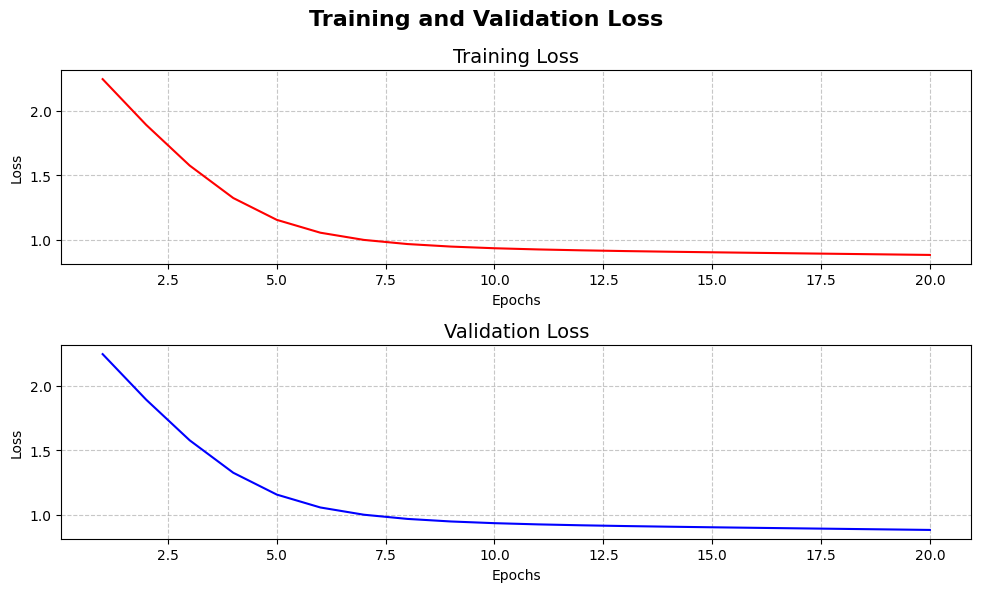

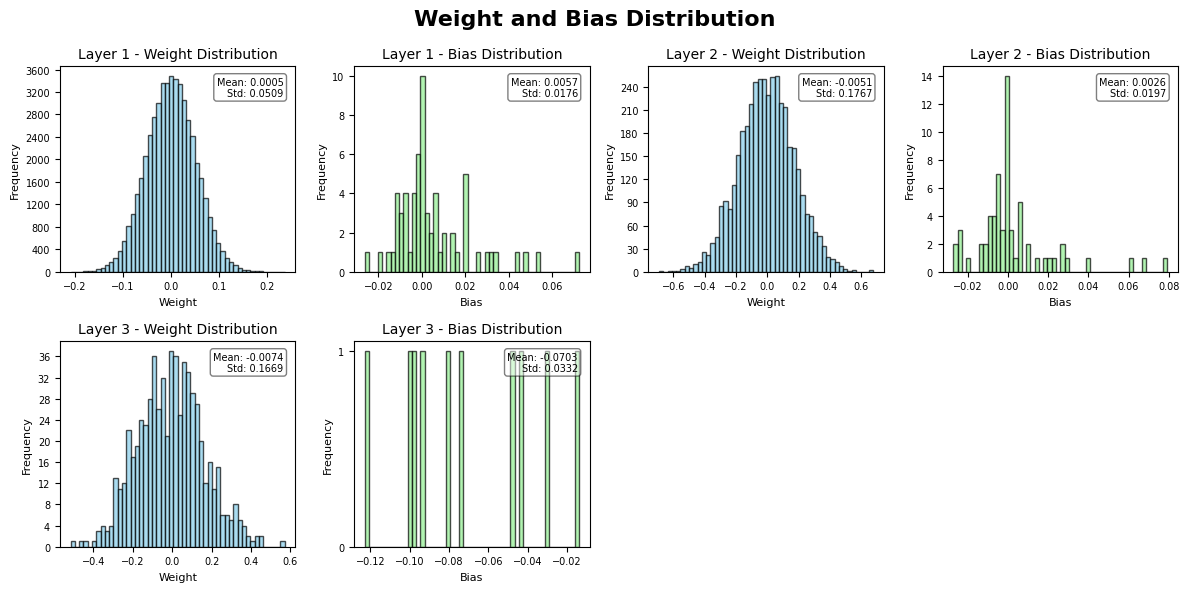

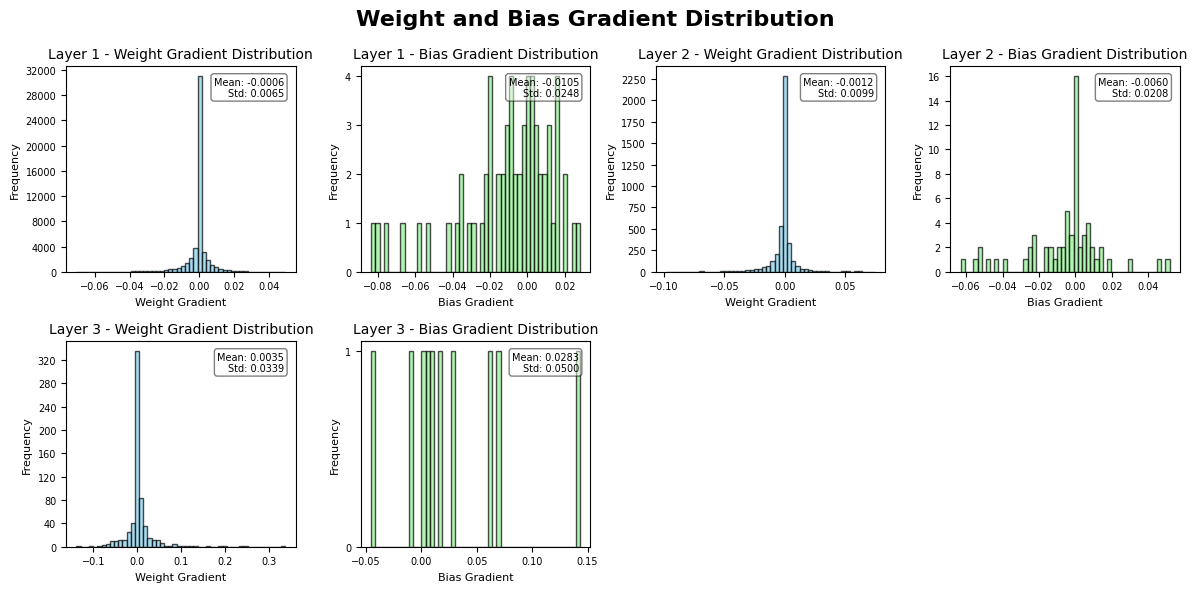

In [14]:
model = FFNN()

# Add layers to the model
model.add_layer(784)
model.add_layer(64, activation_function='relu', initialization_method="he_normal")
model.add_layer(64, activation_function='relu', initialization_method="he_normal")
model.add_layer(10, activation_function='sigmoid', initialization_method="xavier_normal")

# Train the model
model.train(X_train, y_train_one_hot, X_test, y_test_one_hot, 
            learning_rate=0.001, batch_size=64, epochs=20, loss_function="MSE", verbose=1, error_threshold=0.001)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_label)

print(f"Accuracy of FFNN: {accuracy:.4f}")
print(f"y_pred (original): {y_pred_label[:20]}")
# print(f"y_pred (one-hot): {y_pred[:20]}")
print(f"y_test (original): {y_test[:20]}")

# print(f"y_test (one-hot): {y_test_one_hot[:20]}")

# Plot the loss curve
model.plot_loss_function()

# Plot weights distribution for all layers
model.plot_weight_distribution()

# Plot weights gradient distribution for all layers
model.plot_gradient_distribution()

#### Medium (128 neuron tiap hidden layer)

Epoch 20/20 [==================================================] 100.00%, Train Loss: 0.8124, Val Loss: 0.8137
Training completed. Final Train Loss: 0.8124, Val Loss: 0.8137
Accuracy of FFNN: 0.4173
y_pred (original): [8 9 7 7 7 0 1 1 1 9 2 9 7 8 1 0 9 1 0 0]
y_test (original): [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]


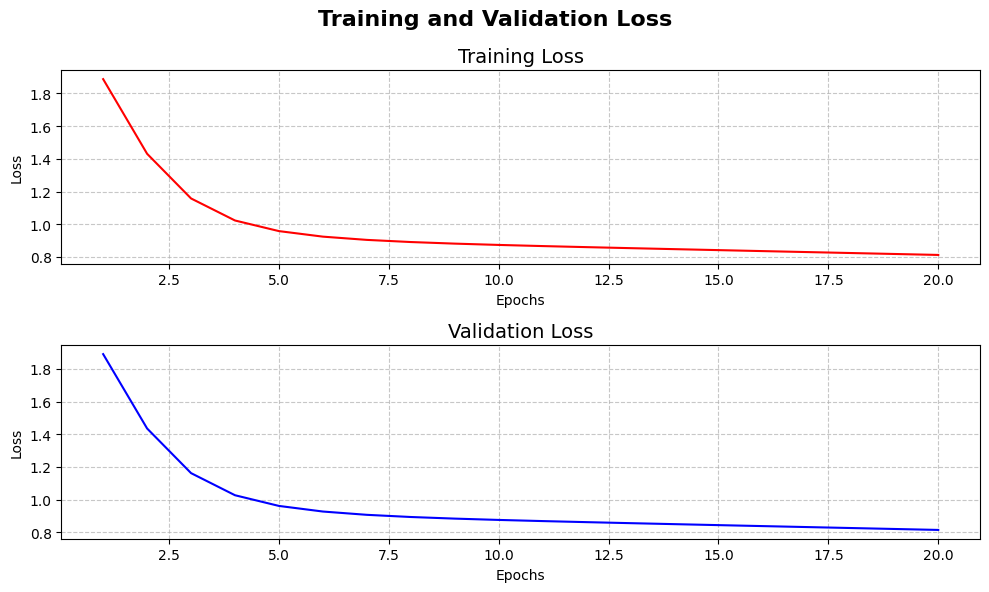

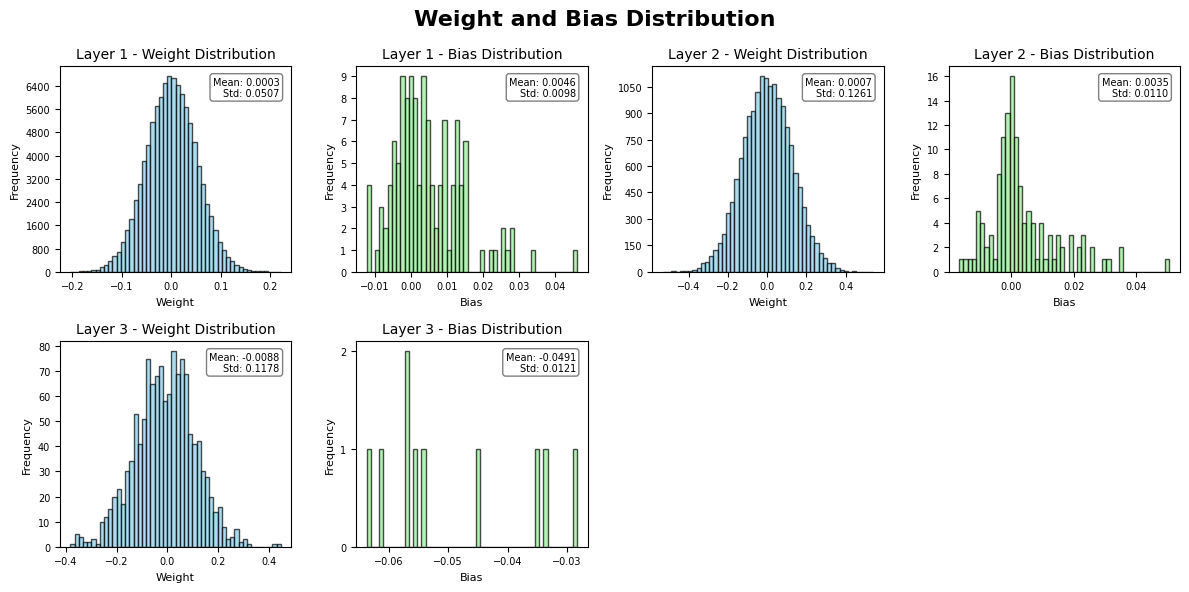

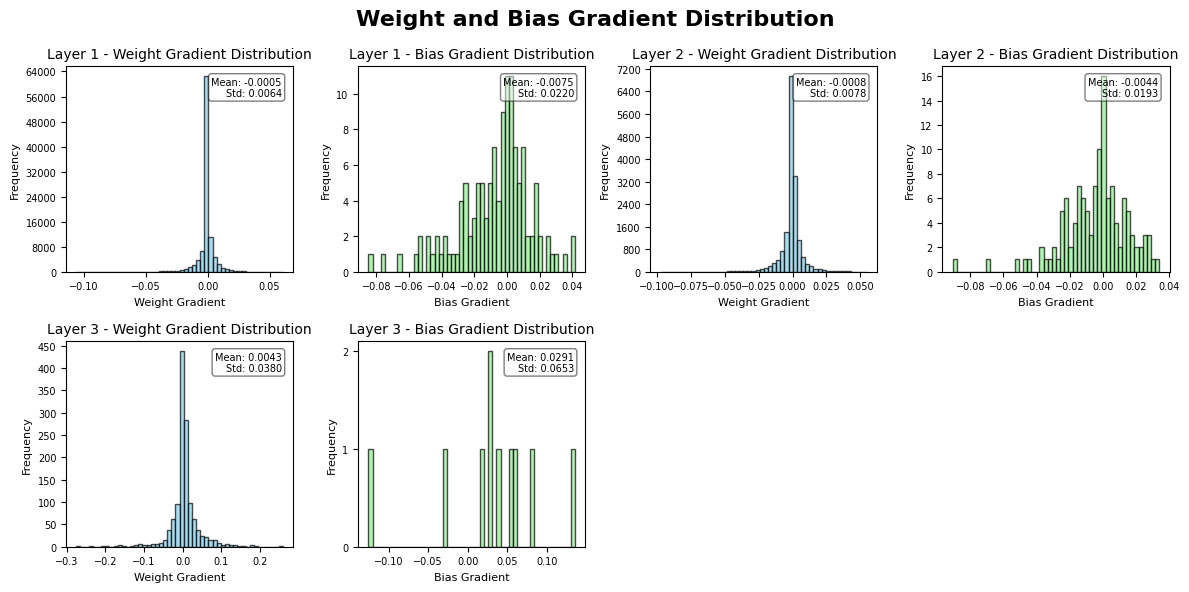

In [15]:
model = FFNN()

# Add layers to the model
model.add_layer(784)
model.add_layer(128, activation_function='relu', initialization_method="he_normal")
model.add_layer(128, activation_function='relu', initialization_method="he_normal")
model.add_layer(10, activation_function='sigmoid', initialization_method="xavier_normal")

# Train the model
model.train(X_train, y_train_one_hot, X_test, y_test_one_hot, 
            learning_rate=0.001, batch_size=64, epochs=20, loss_function="MSE", verbose=1, error_threshold=0.001)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_label)

print(f"Accuracy of FFNN: {accuracy:.4f}")
print(f"y_pred (original): {y_pred_label[:20]}")
# print(f"y_pred (one-hot): {y_pred[:20]}")
print(f"y_test (original): {y_test[:20]}")

# print(f"y_test (one-hot): {y_test_one_hot[:20]}")

# Plot the loss curve
model.plot_loss_function()

# Plot weights distribution for all layers
model.plot_weight_distribution()

# Plot weights gradient distribution for all layers
model.plot_gradient_distribution()

#### Large (256 neuron tiap hidden layer)

Epoch 20/20 [==================================================] 100.00%, Train Loss: 0.7615, Val Loss: 0.7639
Training completed. Final Train Loss: 0.7615, Val Loss: 0.7639
Accuracy of FFNN: 0.5118
y_pred (original): [0 4 0 7 4 0 6 2 1 4 4 4 7 8 2 0 4 1 7 0]
y_test (original): [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]


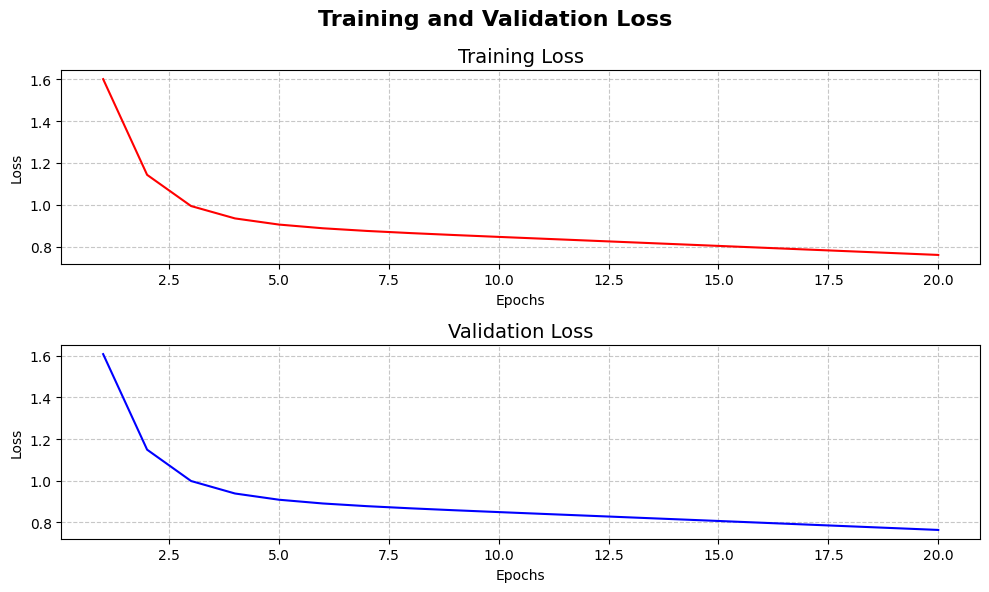

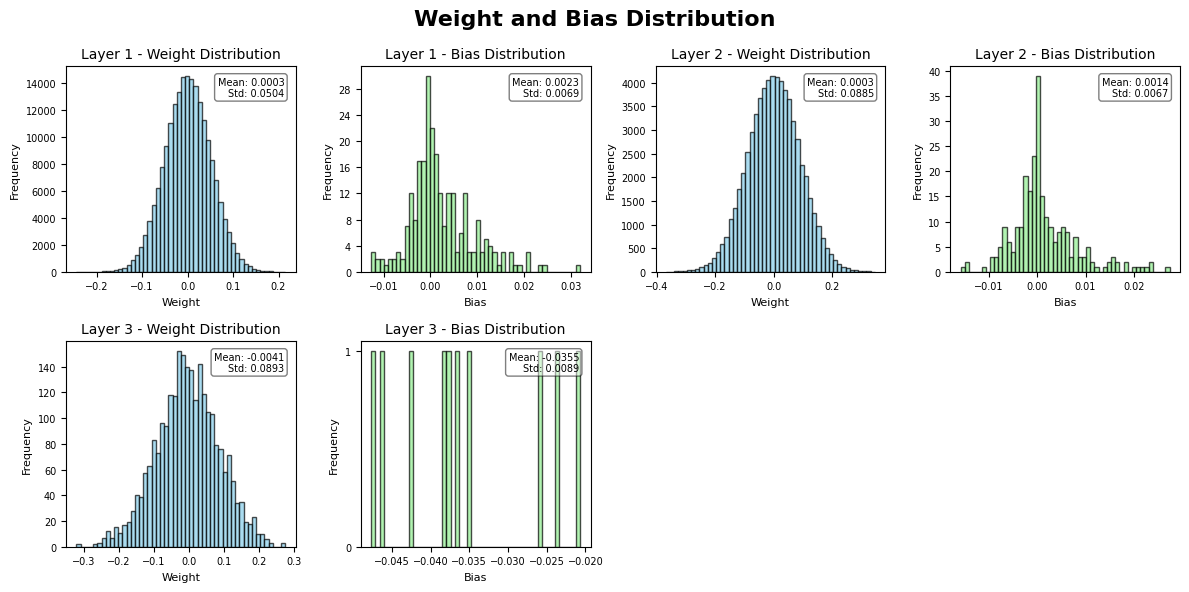

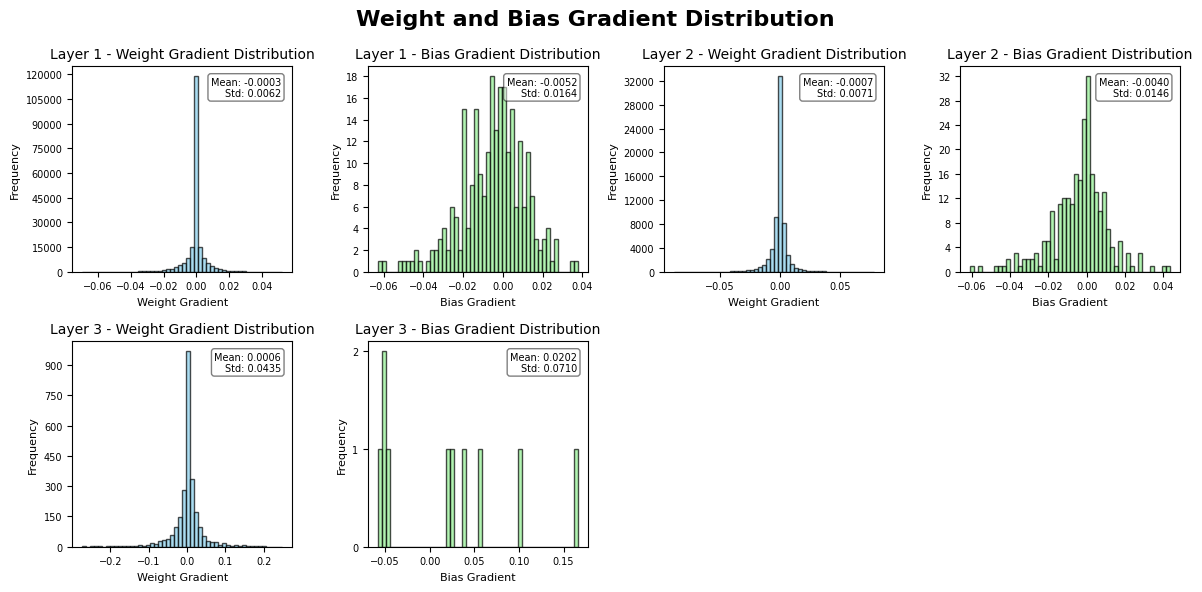

In [16]:
model = FFNN()

# Add layers to the model
model.add_layer(784)
model.add_layer(256, activation_function='relu', initialization_method="he_normal")
model.add_layer(256, activation_function='relu', initialization_method="he_normal")
model.add_layer(10, activation_function='sigmoid', initialization_method="xavier_normal")

# Train the model
model.train(X_train, y_train_one_hot, X_test, y_test_one_hot, 
            learning_rate=0.001, batch_size=64, epochs=20, loss_function="MSE", verbose=1, error_threshold=0.001)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_label)

print(f"Accuracy of FFNN: {accuracy:.4f}")
print(f"y_pred (original): {y_pred_label[:20]}")
# print(f"y_pred (one-hot): {y_pred[:20]}")
print(f"y_test (original): {y_test[:20]}")

# print(f"y_test (one-hot): {y_test_one_hot[:20]}")

# Plot the loss curve
model.plot_loss_function()

# Plot weights distribution for all layers
model.plot_weight_distribution()

# Plot weights gradient distribution for all layers
model.plot_gradient_distribution()

# Pengaruh Depth

#### Shallow (1 layer)

Epoch 20/20 [==================================================] 100.00%, Train Loss: 0.8357, Val Loss: 0.8357
Training completed. Final Train Loss: 0.8357, Val Loss: 0.8357
Accuracy of FFNN: 0.4306
y_pred (original): [7 1 1 7 7 0 6 7 1 1 7 4 7 4 2 0 9 3 7 3]
y_test (original): [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]


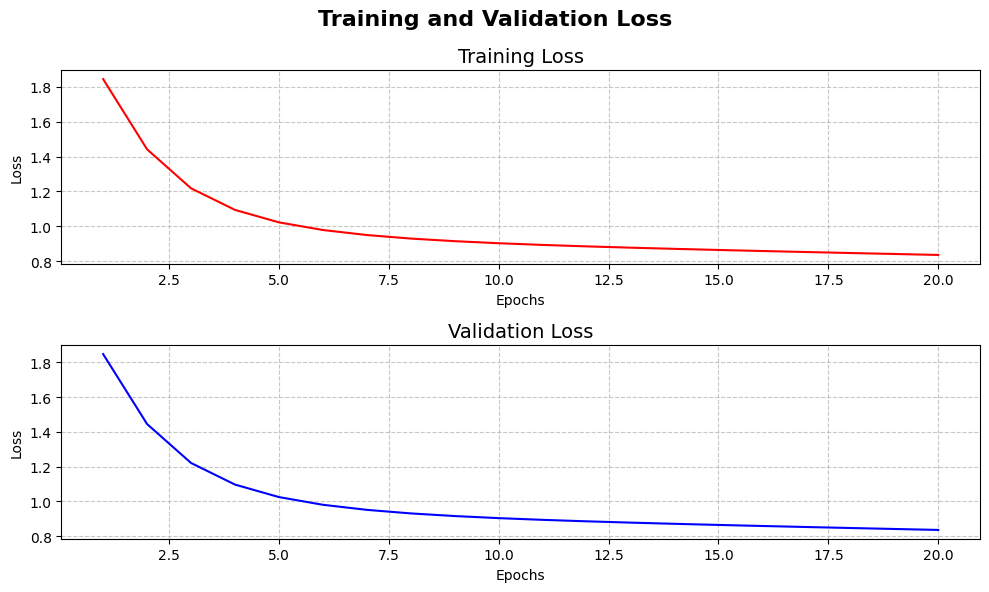

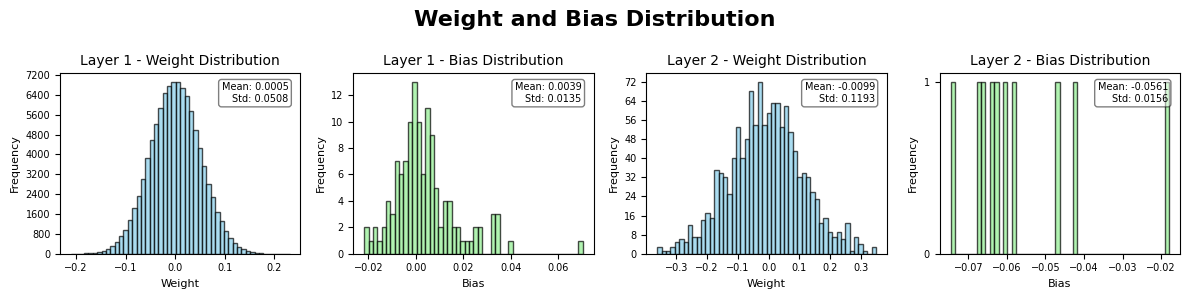

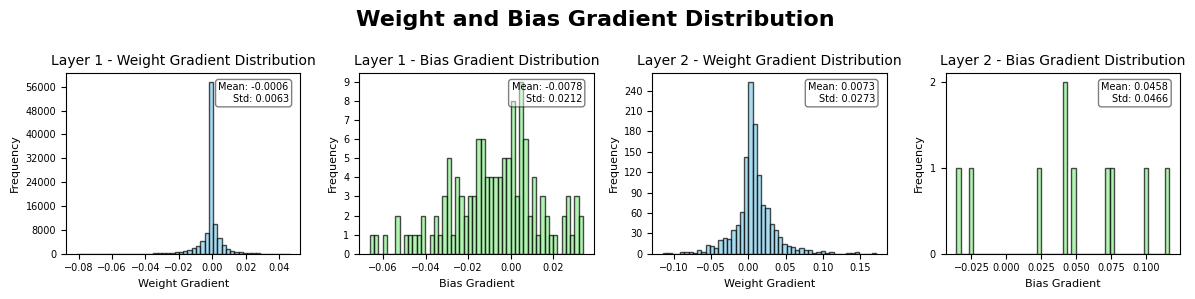

In [17]:
model = FFNN()

# Add layers to the model
model.add_layer(784)
model.add_layer(128, activation_function='relu', initialization_method="he_normal")
model.add_layer(10, activation_function='sigmoid', initialization_method="xavier_normal")

# Train the model
model.train(X_train, y_train_one_hot, X_test, y_test_one_hot, 
            learning_rate=0.001, batch_size=64, epochs=20, loss_function="MSE", verbose=1, error_threshold=0.001)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_label)

print(f"Accuracy of FFNN: {accuracy:.4f}")
print(f"y_pred (original): {y_pred_label[:20]}")
# print(f"y_pred (one-hot): {y_pred[:20]}")
print(f"y_test (original): {y_test[:20]}")

# print(f"y_test (one-hot): {y_test_one_hot[:20]}")

# Plot the loss curve
model.plot_loss_function()

# Plot weights distribution for all layers
model.plot_weight_distribution()

# Plot weights gradient distribution for all layers
model.plot_gradient_distribution()

#### Medium (2 layer)

Epoch 20/20 [==================================================] 100.00%, Train Loss: 0.7895, Val Loss: 0.7893
Training completed. Final Train Loss: 0.7895, Val Loss: 0.7893
Accuracy of FFNN: 0.4739
y_pred (original): [3 4 1 7 7 0 4 7 3 4 1 4 7 3 3 3 4 1 7 3]
y_test (original): [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]


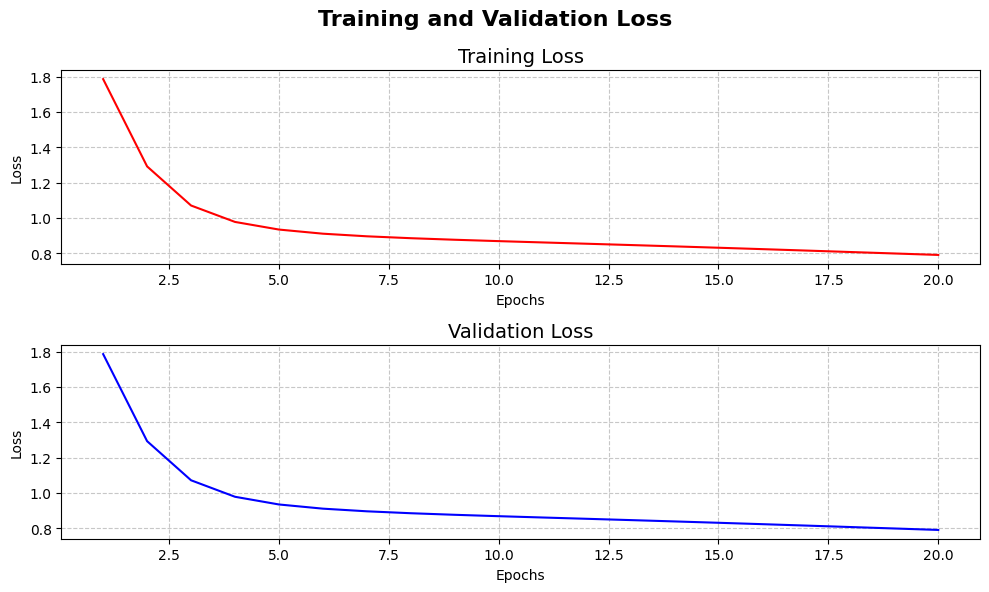

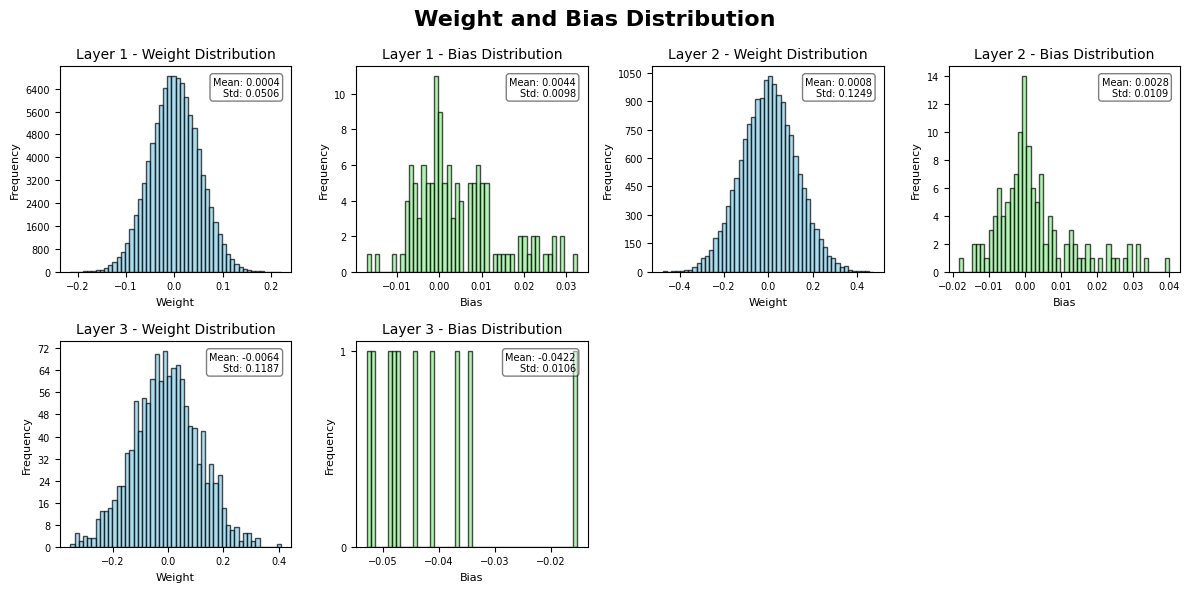

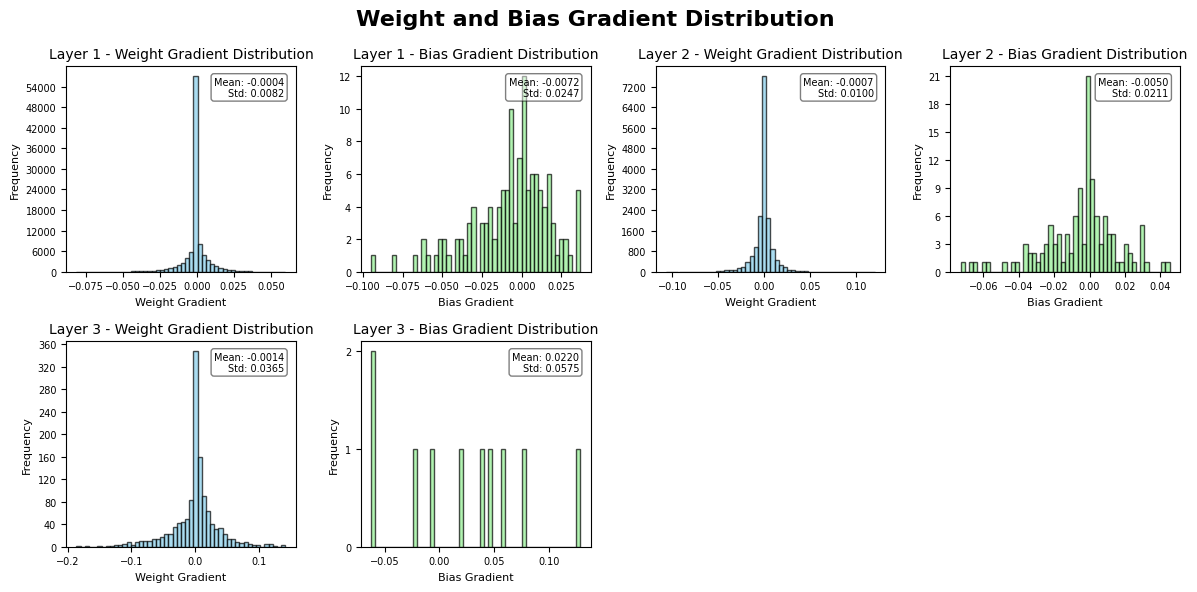

In [18]:
model = FFNN()

# Add layers to the model
model.add_layer(784)
model.add_layer(128, activation_function='relu', initialization_method="he_normal")
model.add_layer(128, activation_function='relu', initialization_method="he_normal")
model.add_layer(10, activation_function='sigmoid', initialization_method="xavier_normal")

# Train the model
model.train(X_train, y_train_one_hot, X_test, y_test_one_hot, 
            learning_rate=0.001, batch_size=64, epochs=20, loss_function="MSE", verbose=1, error_threshold=0.001)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_label)

print(f"Accuracy of FFNN: {accuracy:.4f}")
print(f"y_pred (original): {y_pred_label[:20]}")
# print(f"y_pred (one-hot): {y_pred[:20]}")
print(f"y_test (original): {y_test[:20]}")

# print(f"y_test (one-hot): {y_test_one_hot[:20]}")

# Plot the loss curve
model.plot_loss_function()

# Plot weights distribution for all layers
model.plot_weight_distribution()

# Plot weights gradient distribution for all layers
model.plot_gradient_distribution()

#### Deep (4 layer)

Epoch 20/20 [==================================================] 100.00%, Train Loss: 0.8246, Val Loss: 0.8229
Training completed. Final Train Loss: 0.8246, Val Loss: 0.8229
Accuracy of FFNN: 0.3861
y_pred (original): [1 7 7 7 7 0 6 6 7 7 1 9 7 1 7 0 7 1 7 6]
y_test (original): [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]


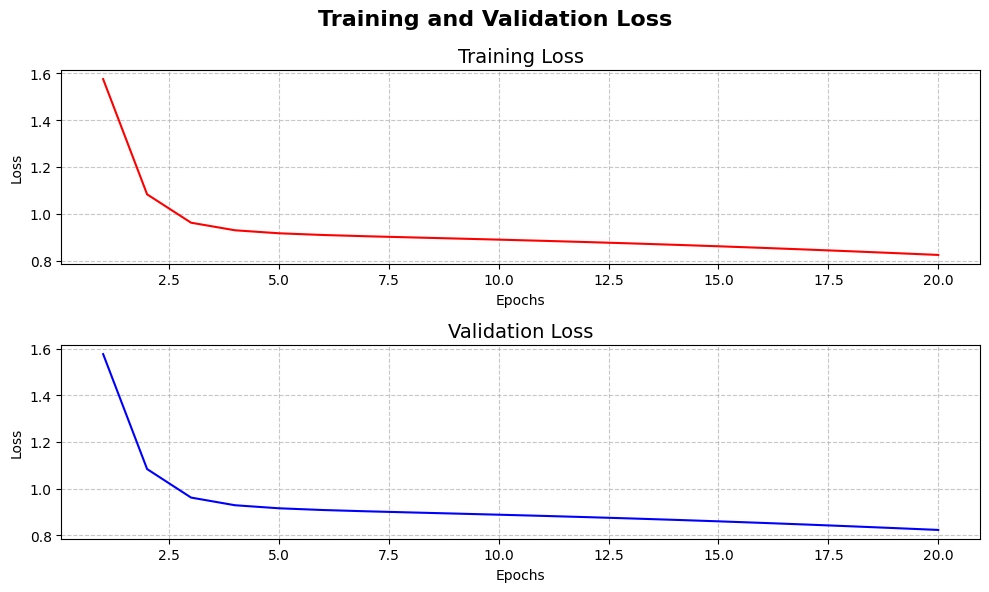

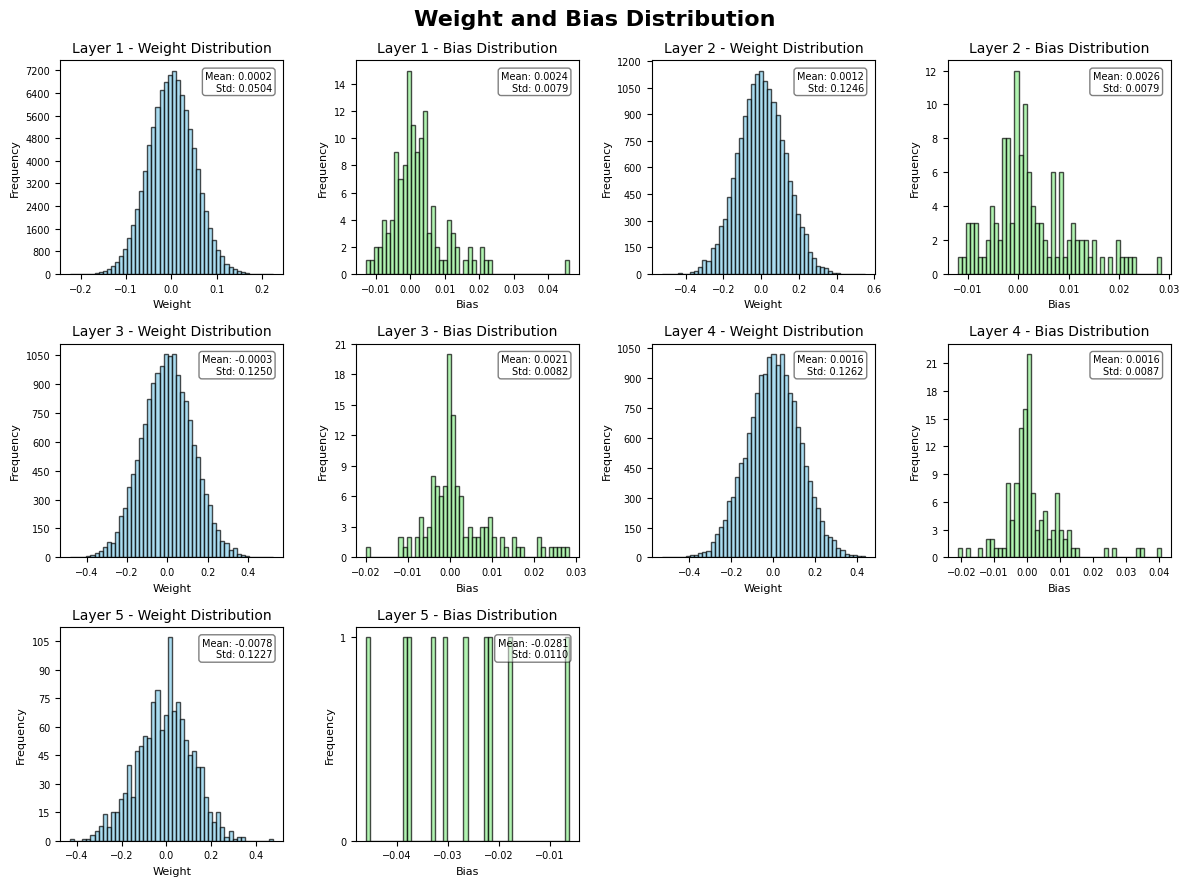

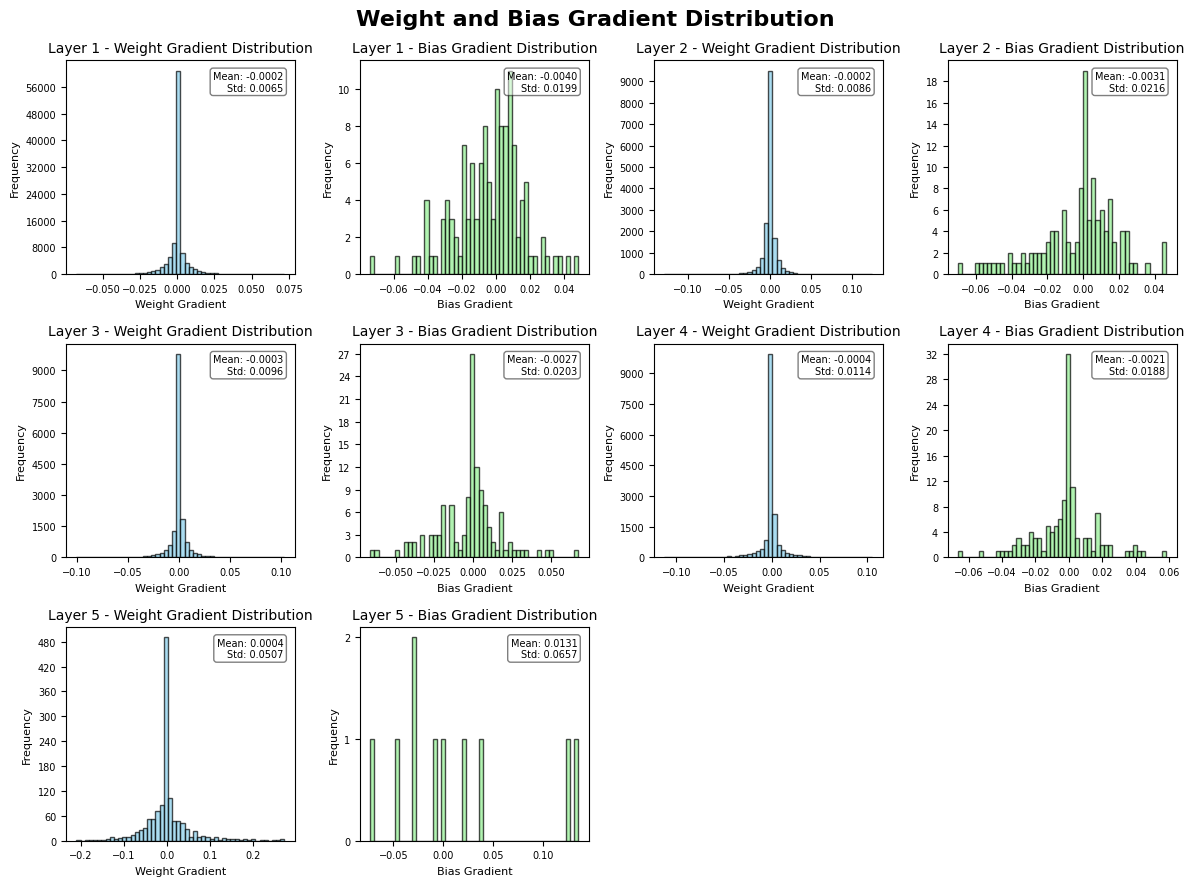

In [19]:
model = FFNN()

# Add layers to the model
model.add_layer(784)
model.add_layer(128, activation_function='relu', initialization_method="he_normal")
model.add_layer(128, activation_function='relu', initialization_method="he_normal")
model.add_layer(128, activation_function='relu', initialization_method="he_normal")
model.add_layer(128, activation_function='relu', initialization_method="he_normal")
model.add_layer(10, activation_function='sigmoid', initialization_method="xavier_normal")

# Train the model
model.train(X_train, y_train_one_hot, X_test, y_test_one_hot, 
            learning_rate=0.001, batch_size=64, epochs=20, loss_function="MSE", verbose=1, error_threshold=0.001)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_label)

print(f"Accuracy of FFNN: {accuracy:.4f}")
print(f"y_pred (original): {y_pred_label[:20]}")
# print(f"y_pred (one-hot): {y_pred[:20]}")
print(f"y_test (original): {y_test[:20]}")

# print(f"y_test (one-hot): {y_test_one_hot[:20]}")

# Plot the loss curve
model.plot_loss_function()

# Plot weights distribution for all layers
model.plot_weight_distribution()

# Plot weights gradient distribution for all layers
model.plot_gradient_distribution()